In [2]:
import pandas as pd
import numpy as np
import os

# Load the data
data_saturday1 = pd.read_csv('DataSaturday1.csv')
data_saturday2 = pd.read_csv('DataSaturday2.csv')
data_saturday3 = pd.read_csv('DataSaturday3.csv')
data_saturday4 = pd.read_csv('DataSaturday4.csv')
data_tuesday1 = pd.read_csv('DataTuesday1.csv')
data_tuesday2 = pd.read_csv('DataTuesday2.csv')
data_tuesday3 = pd.read_csv('DataTuesday3.csv')
data_tuesday4 = pd.read_csv('DataTuesday4.csv')

In [3]:
# Combine all to a data frame
# data_combined = pd.concat([data_saturday1])

In [4]:
# Create a list of all communes (nodes)
nodes = np.unique(np.concatenate((data_saturday1['From'].unique(), data_saturday1['To'].unique())))

In [5]:
# Create an empty connectivity matrix (unique nodes)
n_nodes = len(nodes)
conn_matrix = np.zeros((n_nodes, n_nodes))

In [6]:
# Map the communes to the indices
node_index = {node: i for i, node in enumerate(nodes)}

In [7]:
# Fill in with moving data
for _, row in data_saturday1.iterrows():
    from_node = row['From']
    to_node = row['To']
    count = row['Cnt']

    conn_matrix[node_index[from_node], node_index[to_node]] += count  # summiere die Counts

In [8]:
# Normalize
conn_matrix_normalized = conn_matrix / conn_matrix.sum(axis=1, keepdims=True)  # Zeilenweise Normalisierung

In [9]:
print("Dimensions of conn_matrix_normalized:", conn_matrix_normalized.shape)
print("Data type of conn_matrix_normalized:", conn_matrix_normalized.dtype)
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn_matrix_normalized))
print("Minimum value in conn_matrix_normalized:", np.min(conn_matrix_normalized))
print("Maximum value in conn_matrix_normalized:", np.max(conn_matrix_normalized))
print("Mean value in conn_matrix_normalized:", np.mean(conn_matrix_normalized))
print("Standard deviation in conn_matrix_normalized:", np.std(conn_matrix_normalized))


Dimensions of conn_matrix_normalized: (356, 356)
Data type of conn_matrix_normalized: float64
Number of non-zero elements in conn_matrix_normalized: 2725
Minimum value in conn_matrix_normalized: 0.0
Maximum value in conn_matrix_normalized: 1.0
Mean value in conn_matrix_normalized: 0.0028089887640449437
Standard deviation in conn_matrix_normalized: 0.05093887196373358


In [10]:
# Speichern der Matrix als CSV
output_dir = '/content/connectivity_matrix/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

np.save(os.path.join(output_dir, 'connectivity_matrix.npy'), conn_matrix_normalized)

In [11]:
%pip install geopandas
%pip install shapely.geometry

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load the commune info
kommune_lat_lon = pd.read_csv('KommuneLatLon.csv')

In [13]:
# Schritt 2: Lade die Konnektivitätsmatrix
conn_matrix = np.load('/content/connectivity_matrix/connectivity_matrix.npy')

In [14]:
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn_matrix))

Number of non-zero elements in conn_matrix_normalized: 2725


In [15]:
# Schritt 3: Erstelle eine GeoDataFrame mit den Kommunen
geometry = [Point(xy) for xy in zip(kommune_lat_lon['longitude'], kommune_lat_lon['latitude'])]
gdf = gpd.GeoDataFrame(kommune_lat_lon, geometry=geometry)

In [16]:
# Schritt 4: Lade die Karte von Norwegen aus dem Shapefile
norway_map = gpd.read_file('countries')  
norway_map = norway_map[norway_map['NAME'] == "Norway"]  

<AxesSubplot:>

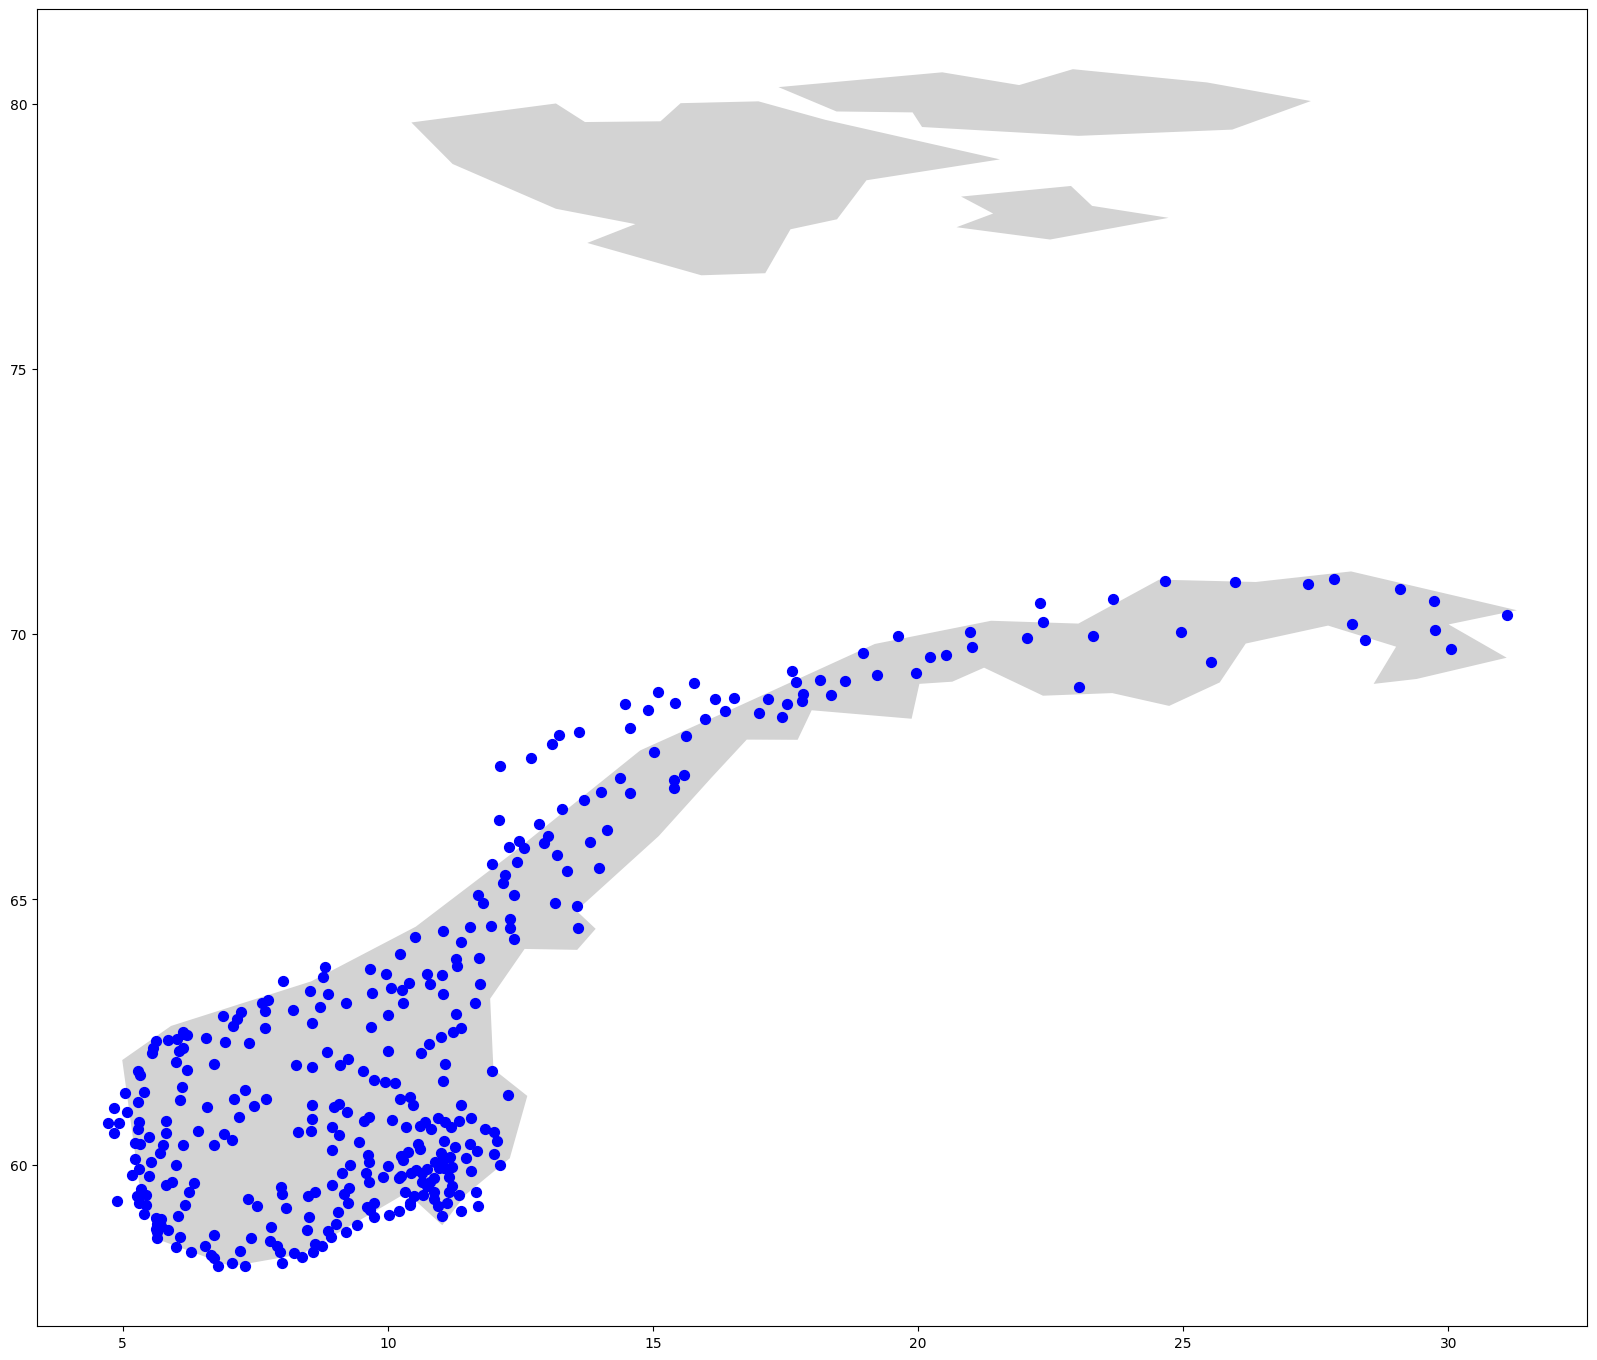

In [17]:
# Schritt 5: Zeichne die Karte
fig, ax = plt.subplots(figsize=(20, 20))
norway_map.plot(ax=ax, color='lightgrey')

# Schritt 6: Zeichne die Kommunen
gdf.plot(ax=ax, color='blue', markersize=50, label='communes')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


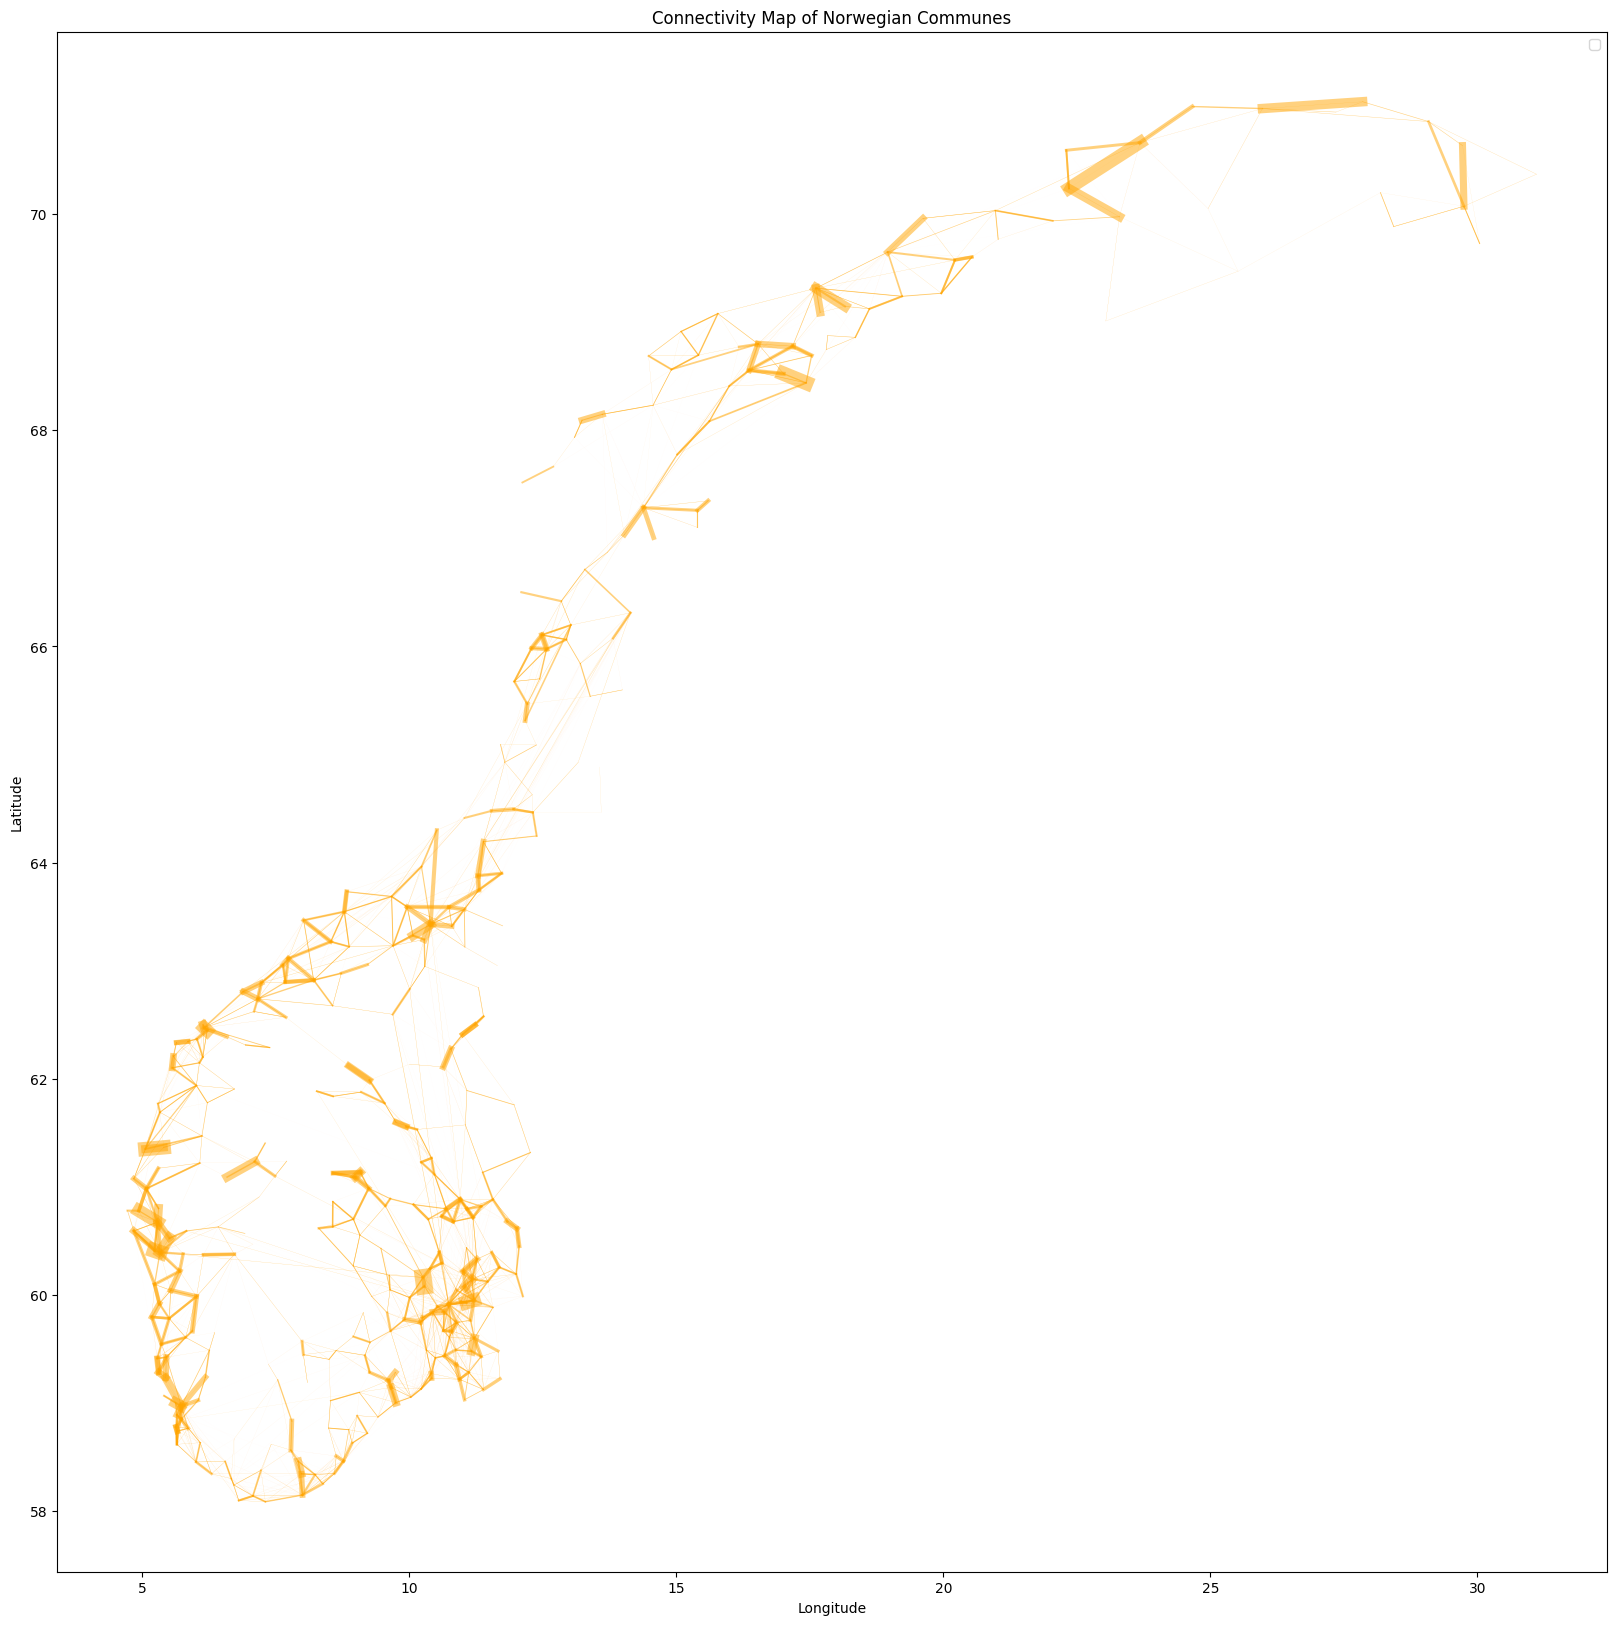

In [18]:
# Schritt 2: Füge die Verbindungen mit Farbskala hinzu
fig, ax = plt.subplots(figsize=(20, 20))
n_nodes = len(gdf)
for i in range(n_nodes):
    for j in range(n_nodes):
        if conn_matrix[i, j] > 0:  # Überprüfen, ob es eine Verbindung gibt
            line = LineString([gdf.geometry[i], gdf.geometry[j]])
            # Dicke der Linie basierend auf dem Verbindungswert
            line_width = conn_matrix[i, j] * 100  # Beispiel: Maximal 10
            plt.plot(*line.xy, color='orange', alpha=0.5, linewidth=line_width)

# Schritt 8: Diagramm anpassen
plt.title('Connectivity Map of Norwegian Communes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

CONN2RES FRAMEWORK

In [19]:
# Clone the conn2res repository
!git clone https://github.com/netneurolab/conn2res.git

# Move to directory
%cd conn2res

c:\Users\49171\Desktop\Master\Semester 3\Job\First Data - 10 CSV\conn2res


fatal: destination path 'conn2res' already exists and is not an empty directory.


In [20]:
%pip install . --no-deps

Processing c:\users\49171\desktop\master\semester 3\job\first data - 10 csv\conn2res
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for conn2res: filename=conn2res-1.0.0a0+37.gb5c887f.dirty-py3-none-any.whl size=38679 sha256=6fb8c4e8675f70efe5c47827571dd2c0d86592868c1fa48a97129649f920f459
  Stored in directory: C:\Users\49171\AppData\Local\Temp\pip-ephem-wheel-cache-2v44ktae\wheels\49\08\1e\f0eeb673ced4739b2407e792c6fc9037a4fd127522339646ae
Successfully built conn2res
  Attempting uninstall: conn2res
    Found existing installation: conn2res 1.0.0a0+37.gb5c887f.dirty
    Uninstalling conn2res-1.0.0a0+37.gb5c887f.dirty:
      Successfully uninstalled conn2res-1.0.0a0+37.gb5c887f.dirty
Note: you may need to rest

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [21]:
%pip install neurogym
import neurogym

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install reservoirpy bctpy

import reservoirpy
import conn2res

Note: you may need to restart the kernel to use updated packages.


In [23]:
%matplotlib inline

import warnings
import os
import numpy as np
import pandas as pd
from sklearn.base import is_classifier
from conn2res.tasks import Conn2ResTask
from conn2res.tasks import NeuroGymTask
from conn2res.connectivity import Conn
from conn2res.reservoir import EchoStateNetwork
from conn2res.readout import Readout, multioutput_regressor
from conn2res.performance import mean_squared_error, r2_score, root_mean_squared_error, corrcoef
from conn2res import readout, plotting

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [24]:
# name of the tasks to be performed
TASK = 'MemoryCapacity'

# define metrics to evaluate readout's model performance
METRICS = ['mean_squared_error', 'r2_score', 'root_mean_squared_error']


# define alpha values to vary global reservoir dynamics
ALPHAS = np.linspace(0.5 , 1.5, 5)

# activation function defines local dynamics
ACT_FCN = 'tanh'  # 'sigmoid'

Second, let's fetch a NeuroGym task data set.

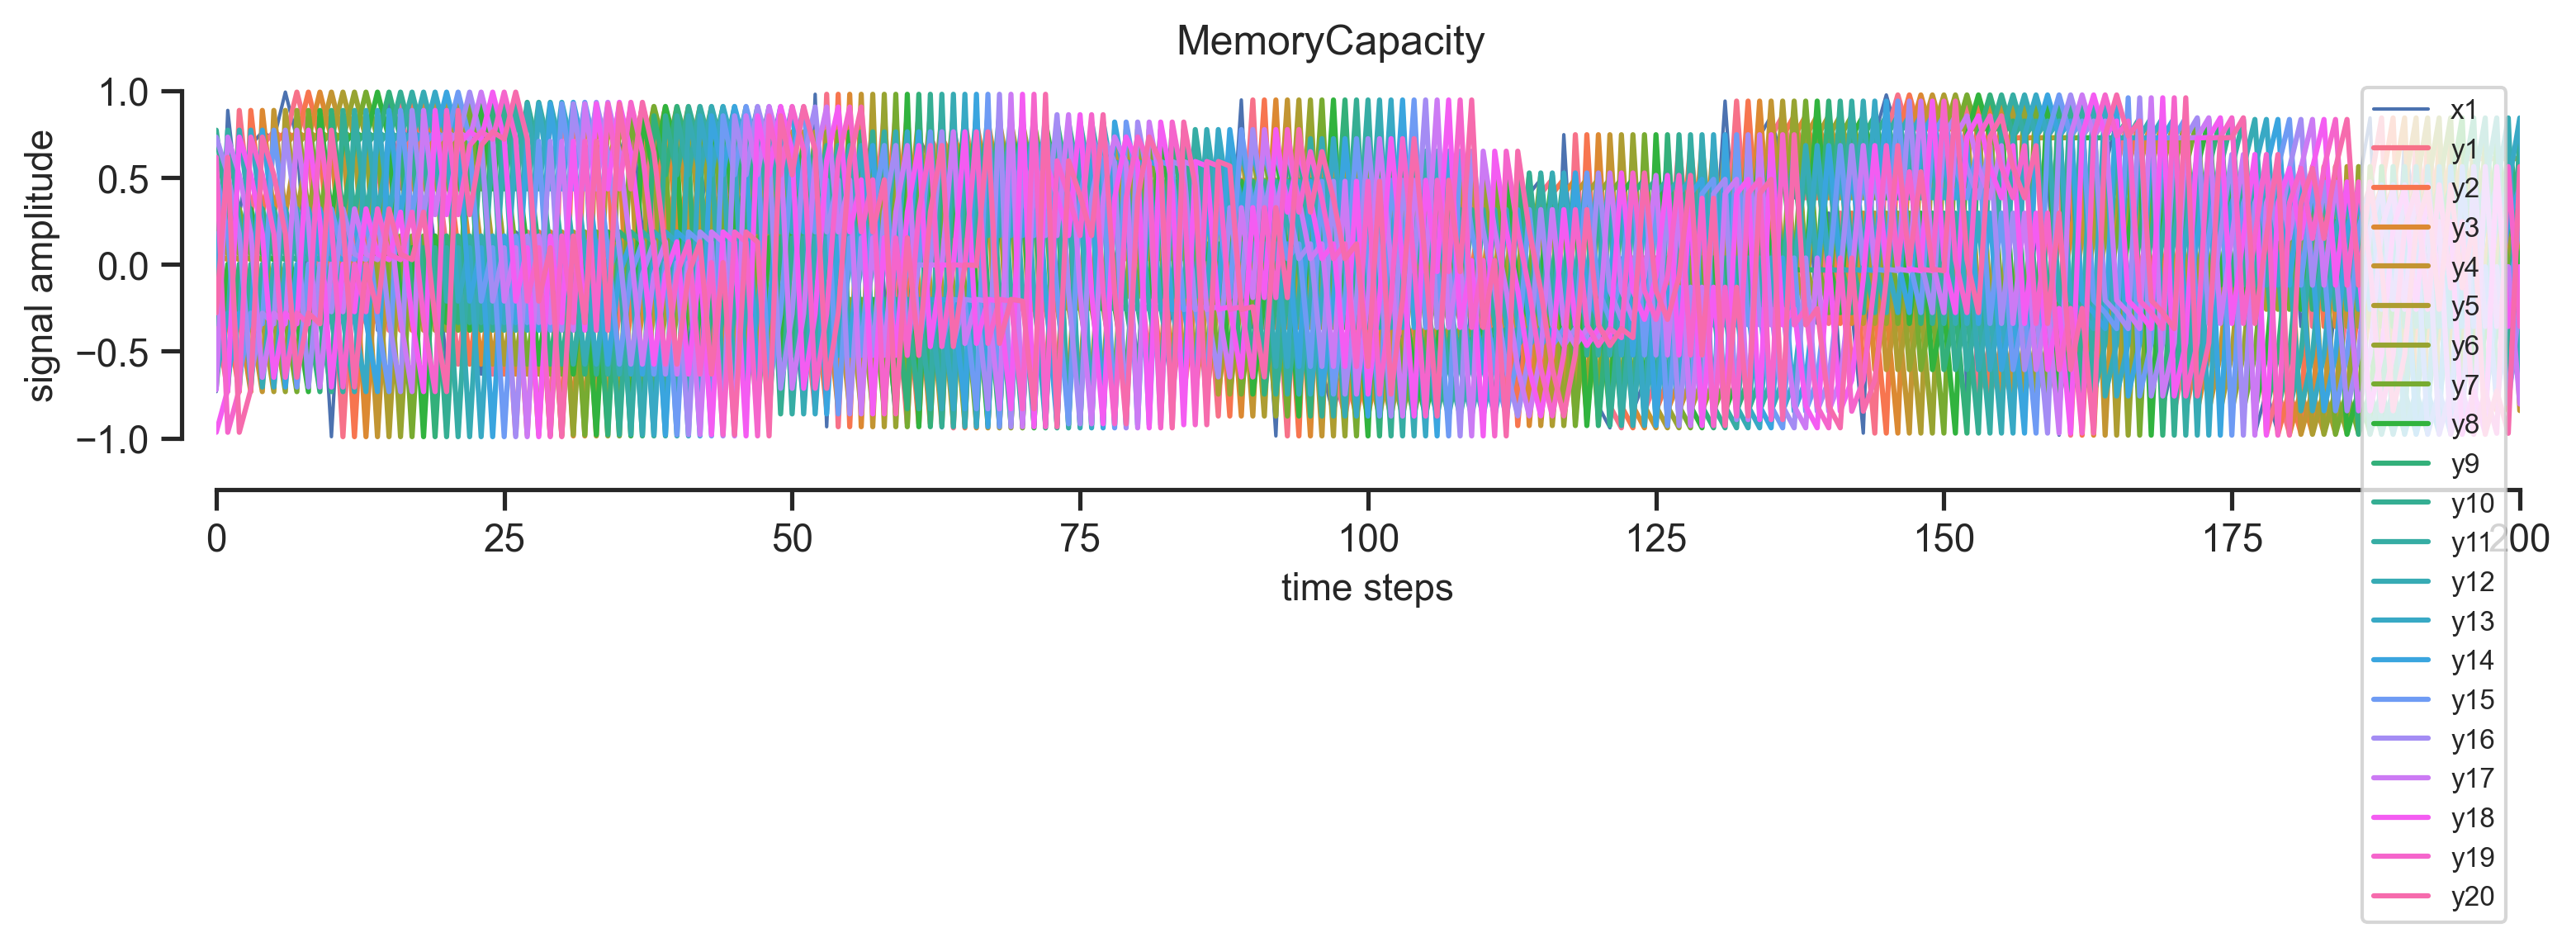

In [25]:
# instantiate task object
task = Conn2ResTask(name=TASK)

# amount of multiplications
n_repeats = 1

# fetch input/output data to perform task
x, y = task.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

In [26]:
"""# instantiate task object
task_2 = NeuroGymTask(name=TASK_2)

# amount of multiplications
# n_repeats = 1

# fetch input/output data to perform task
x, y = task_2.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task_2.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)"""

"# instantiate task object\ntask_2 = NeuroGymTask(name=TASK_2)\n\n# amount of multiplications\n# n_repeats = 1\n\n# fetch input/output data to perform task\nx, y = task_2.fetch_data(n_trials=1000, input_gain=1)\n# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]\n\n# plot input/output (x/y) data\nplotting.plot_iodata(\n    x, y, title=task_2.name,\n    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},\n    show=True\n)\n\n# split data into training and test sets\nx_train, x_test, y_train, y_test = readout.train_test_split(x, y)"

In [27]:
"""# instantiate task object
task_3 = Conn2ResTask(name=TASK_3)

# amount of multiplications
# n_repeats = 1

# fetch input/output data to perform task
x, y = task_3.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task_3.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)"""

"# instantiate task object\ntask_3 = Conn2ResTask(name=TASK_3)\n\n# amount of multiplications\n# n_repeats = 1\n\n# fetch input/output data to perform task\nx, y = task_3.fetch_data(n_trials=1000, input_gain=1)\n# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]\n\n# plot input/output (x/y) data\nplotting.plot_iodata(\n    x, y, title=task_3.name,\n    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},\n    show=True\n)\n\n# split data into training and test sets\nx_train, x_test, y_train, y_test = readout.train_test_split(x, y)"

Third, let's import the connectivity matrix we are going to use to define the connections of the reservoir.  

For this we will be using the human connectome parcellated into 1015 brain regions following the Desikan Killiany atlas (Desikan, et al., 2006).

In [28]:
# Pfad zu 'connectivity.npy'-Datei in Google Drive
filename = 'content/connectivity_matrix/connectivity_matrix.npy'

# Erstelle das Conn-Objekt und lade die Konnektivitätsdaten aus dem angegebenen Pfad
conn = Conn(filename=filename)

Let's define the set of input and output nodes.

To do so, we will use functional intrinsic networks (Yeo ,et al., 2011).

In [29]:
"""# Define input and output nodes
n_input_nodes = 50  # 50 as input nodes
n_output_nodes = 50  # 50 as output nodes

# Select random input nodes
input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)  # Zufällige Eingabeknoten

# Ensure output nodes are different from input nodes
all_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Select random output nodes from the remaining nodes
output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Zufällige Ausgabeknoten

print("Anzahl der Input Nodes:", len(input_nodes))
print("Anzahl der Output Nodes:", len(output_nodes))"""

'# Define input and output nodes\nn_input_nodes = 50  # 50 as input nodes\nn_output_nodes = 50  # 50 as output nodes\n\n# Select random input nodes\ninput_nodes = conn.get_nodes(\'random\', n_nodes=n_input_nodes)  # Zufällige Eingabeknoten\n\n# Ensure output nodes are different from input nodes\nall_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes\navailable_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool\n\n# Select random output nodes from the remaining nodes\noutput_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Zufällige Ausgabeknoten\n\nprint("Anzahl der Input Nodes:", len(input_nodes))\nprint("Anzahl der Output Nodes:", len(output_nodes))'

In [30]:
"""

For RANDOM node-selection




num_features = 3  # Number of input signals
num_nodes_per_input = 1  # Number of nodes each input signal should be passed to

# Define input and output nodes
n_input_nodes = num_features * num_nodes_per_input  # Total input nodes
n_output_nodes = 6  # Example number of output nodes

# Select random input nodes
input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)  # Random input nodes

# Ensure output nodes are different from input nodes
all_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Select random output nodes from the remaining nodes
output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Random output nodes

# Initialize w_in
w_in = np.zeros((num_features, conn.n_nodes))

# Map each input signal to multiple nodes
for i in range(num_features):
    for j in range(num_nodes_per_input):
        w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1
        
"""        

"\n\nFor RANDOM node-selection\n\n\n\n\nnum_features = 3  # Number of input signals\nnum_nodes_per_input = 1  # Number of nodes each input signal should be passed to\n\n# Define input and output nodes\nn_input_nodes = num_features * num_nodes_per_input  # Total input nodes\nn_output_nodes = 6  # Example number of output nodes\n\n# Select random input nodes\ninput_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)  # Random input nodes\n\n# Ensure output nodes are different from input nodes\nall_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes\navailable_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool\n\n# Select random output nodes from the remaining nodes\noutput_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Random output nodes\n\n# Initialize w_in\nw_in = np.zeros((num_features, conn.n_nodes))\n\n# Map each input signal to multiple nodes\nfor i in range(num_features):\n    for 

In [31]:
"""

For INFORMED node-selection

"""


import numpy as np

num_features = 1 # Number of input signals
num_nodes_per_input = 1  # Number of nodes each input signal should be passed to

# Berechne den Out-Degree und In-Degree für jeden Knoten
out_degree = np.sum(conn_matrix, axis=1)  # Zeilensummen (Out-Degree)
in_degree = np.sum(conn_matrix, axis=0)   # Spaltensummen (In-Degree)

# Wähle die Knoten mit den höchsten Out-Degree-Werten für Input-Nodes
n_input_nodes = num_features * num_nodes_per_input  # Total input nodes
input_nodes = np.argsort(out_degree)[-n_input_nodes:]  # Top-n Knoten mit den höchsten Out-Degree-Werten

# Stelle sicher, dass Output-Nodes keine Input-Nodes sind
all_nodes = set(range(conn.n_nodes))
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Wähle die Knoten mit den höchsten In-Degree-Werten für Output-Nodes aus den verbleibenden Knoten
n_output_nodes = 2 # Beispielhafte Anzahl von Output-Nodes
remaining_in_degrees = in_degree[available_nodes]  # Berechne In-Degree nur für verbleibende Knoten
sorted_remaining_nodes = np.argsort(remaining_in_degrees)  # Sortiere die verbleibenden Knoten nach In-Degree
output_nodes = np.array(available_nodes)[sorted_remaining_nodes[-n_output_nodes:]]  # Wähle Top-n Output-Nodes

# Initialisiere w_in
w_in = np.zeros((num_features, conn.n_nodes))

# Weise jedem Input-Signal mehrere Nodes zu
for i in range(num_features):
    for j in range(num_nodes_per_input):
        w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1

# Zeige die gewählten Input- und Output-Nodes an
print("Gewählte Input Nodes (hoher Out-Degree):", input_nodes)
print("Gewählte Output Nodes (hoher In-Degree):", output_nodes)


Gewählte Input Nodes (hoher Out-Degree): [311]
Gewählte Output Nodes (hoher In-Degree): [  2 236]


In [32]:
task.n_features = len(input_nodes)  # Setze n_features auf die Anzahl der gewählten Knoten

In [33]:
# 1. Anzahl der Eingabeknoten festlegen
n_input_nodes = len(input_nodes)  # Anzahl der spezifischen Knoten, die du ausgewählt hast

# 2. Erstelle w_in mit der korrekten Form
w_in = np.zeros((task.n_features, conn.n_nodes))  # (n_features, n_nodes)

# 3. Setze die Identitätsmatrix in w_in
# Hier stellen wir sicher, dass die Form von np.eye() korrekt ist
if n_input_nodes == task.n_features:
    w_in[:, input_nodes] = np.eye(task.n_features)  # Hier passen die Dimensionen
else:
    raise ValueError("Die Anzahl der Input-Nodes muss gleich der Anzahl der task.n_features sein.")


Now we will create the input connectivity matrix to define the connections between the input layer (source nodes where the input signal is coming from) and the input nodes in the reservoir.

In [34]:
w_in = np.zeros((task.n_features, conn.n_nodes))
w_in[:, input_nodes] = np.eye(task.n_features) * 10

In [35]:
print("Anzahl der Input Nodes:", len(input_nodes))
print("Anzahl der task.n_features:", task.n_features)
print("Anzahl der Output Nodes:", len(output_nodes))

Anzahl der Input Nodes: 1
Anzahl der task.n_features: 1
Anzahl der Output Nodes: 2


Next, we will simulate the dynamics of the reservoir. We will evaluate the effect of local network dynamics by using different activation functions. We will also evaluate network performance across dynamical regimes by parametrically tuning alpha, which corresponds to the spectral radius of the connectivity matrix (alpha parameter).

In [36]:
print(y_test.shape)
print(y_train.shape) 

(300, 20)
(700, 20)


In [37]:
from sklearn.multioutput import MultiOutputRegressor

In [38]:
# instantiate an Echo State Network object
esn = EchoStateNetwork(w=conn.w, activation_function="relu")

# instantiate a Readout module object
readout_module = Readout(estimator=multioutput_regressor())

In [39]:
print("Chosen estimator class:", type(readout_module.model))
print("Chosen estimator details:", readout_module.model)

Chosen estimator class: <class 'sklearn.multioutput.MultiOutputRegressor'>
Chosen estimator details: MultiOutputRegressor(estimator=Ridge(alpha=0.5, fit_intercept=False))


In [40]:
"""# 1. Definiere die Anzahl der Eingabeknoten (hier wird auf 3 gesetzt, um mit task.n_features übereinzustimmen)
input_nodes = input_nodes[:task.n_features]  # Wähle die ersten 3 Knoten

# 2. Erstelle w_in mit der korrekten Form
w_in = np.zeros((task.n_features, conn.n_nodes))  # (3, 356)

# 3. Setze die Identitätsmatrix in w_in
w_in[:, input_nodes] = np.eye(task.n_features)"""

'# 1. Definiere die Anzahl der Eingabeknoten (hier wird auf 3 gesetzt, um mit task.n_features übereinzustimmen)\ninput_nodes = input_nodes[:task.n_features]  # Wähle die ersten 3 Knoten\n\n# 2. Erstelle w_in mit der korrekten Form\nw_in = np.zeros((task.n_features, conn.n_nodes))  # (3, 356)\n\n# 3. Setze die Identitätsmatrix in w_in\nw_in[:, input_nodes] = np.eye(task.n_features)'

In [41]:
"""num_features = 3  # Definiere die Anzahl der Merkmale

# Wähle nur die ersten 3 Input Nodes aus
if len(input_nodes) > num_features:
    input_nodes = input_nodes[:num_features]  # Behalte nur die ersten 3 Knoten

# w_in korrekt definieren
w_in = np.zeros((num_features, conn.n_nodes))  
w_in[:, input_nodes] = np.eye(num_features)[:, :len(input_nodes)]"""

'num_features = 3  # Definiere die Anzahl der Merkmale\n\n# Wähle nur die ersten 3 Input Nodes aus\nif len(input_nodes) > num_features:\n    input_nodes = input_nodes[:num_features]  # Behalte nur die ersten 3 Knoten\n\n# w_in korrekt definieren\nw_in = np.zeros((num_features, conn.n_nodes))  \nw_in[:, input_nodes] = np.eye(num_features)[:, :len(input_nodes)]'

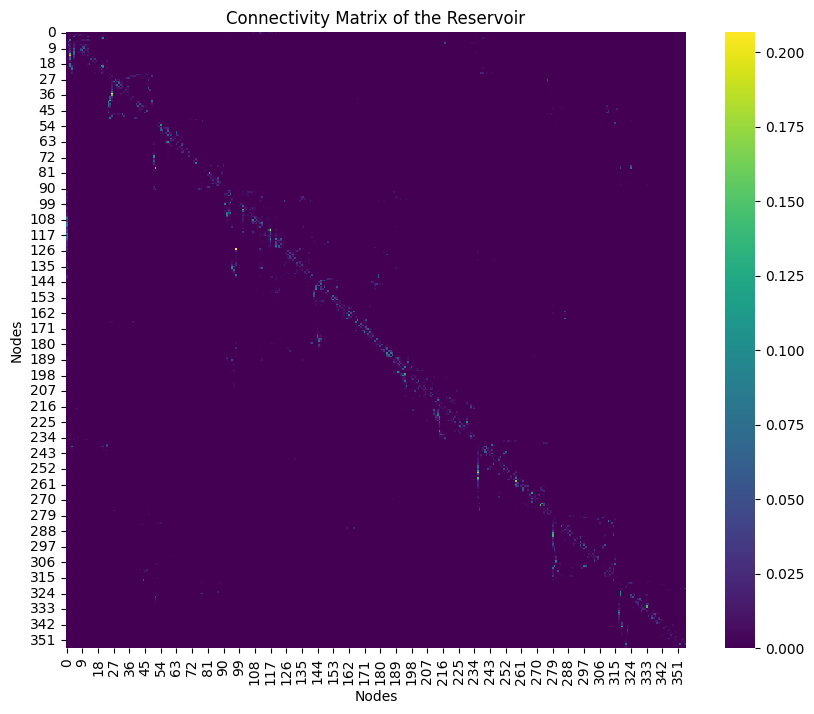

In [42]:
import seaborn as sns

# Assuming conn.w is your connectivity matrix
connectivity_matrix = conn.w

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_matrix, cmap='viridis', cbar=True)
plt.title('Connectivity Matrix of the Reservoir')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.show()

Finally, let's visualize task performance.

In [43]:
print(input_nodes)
print(output_nodes)

[311]
[  2 236]


In [44]:
# Drucke die Namen der ausgewählten Input- und Output-Nodes
print("Input Nodes:", kommune_lat_lon.loc[input_nodes, 'name'].values)
print("Output Nodes:", kommune_lat_lon.loc[output_nodes, 'name'].values)

Input Nodes: ['Hitra']
Output Nodes: ['Stavanger' 'Bergen']


In [45]:
print(f"w_in shape: {w_in.shape}")
print(f"connectivity_matrix shape: {connectivity_matrix.shape}")
print(f"output_nodes: {output_nodes}")
print("x_test shape:", x_test[0].shape)
print("x_train shape:", x_train[0].shape)
print("Number of non-zero elements in connectivity_matrix:", np.count_nonzero(connectivity_matrix))

w_in shape: (1, 356)
connectivity_matrix shape: (356, 356)
output_nodes: [  2 236]
x_test shape: (1,)
x_train shape: (1,)
Number of non-zero elements in connectivity_matrix: 8893


In [46]:
x, y = task.fetch_data(n_trials=1000, horizon_max=-20, win=30, low=-1, high=1, input_gain=1)
print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1000, 1), y shape: (1000, 20)


In [47]:
print(f"w_in shape: {w_in.shape}, x_train shape: {x_train[0].shape}")
print(f"output_nodes: {output_nodes}, y_train shape: {y_train.shape}")

w_in shape: (1, 356), x_train shape: (1,)
output_nodes: [  2 236], y_train shape: (700, 20)


In [48]:
df_alpha = []

# Teste verschiedene Werte für alpha
for alpha in ALPHAS:
    print(f'\n\t\t\t----- alpha = {alpha} -----')

    # Skaliere die Konnektivitätsmatrix
    esn.w = alpha * conn_matrix

    # Simuliere die Reservoir-Zustände
    rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
    rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

    # Führe die Aufgabe aus und speichere die Ergebnisse
    df_res = readout_module.run_task(
        X=(rs_train, rs_test), y=(y_train, y_test),
        sample_weight='both', metric=METRICS
    )
    df_res['alpha'] = alpha
    df_alpha.append(df_res)

# Ergebnisse zusammenfassen
df_alpha = pd.concat(df_alpha, ignore_index=True)


			----- alpha = 0.5 -----

			----- alpha = 0.75 -----

			----- alpha = 1.0 -----

			----- alpha = 1.25 -----

			----- alpha = 1.5 -----



			----- alpha = 0.5 -----
Alpha = 0.5, Number of non-zero elements in scaled w: 8893

			----- alpha = 0.75 -----
Alpha = 0.75, Number of non-zero elements in scaled w: 8893

			----- alpha = 1.0 -----
Alpha = 1.0, Number of non-zero elements in scaled w: 8893


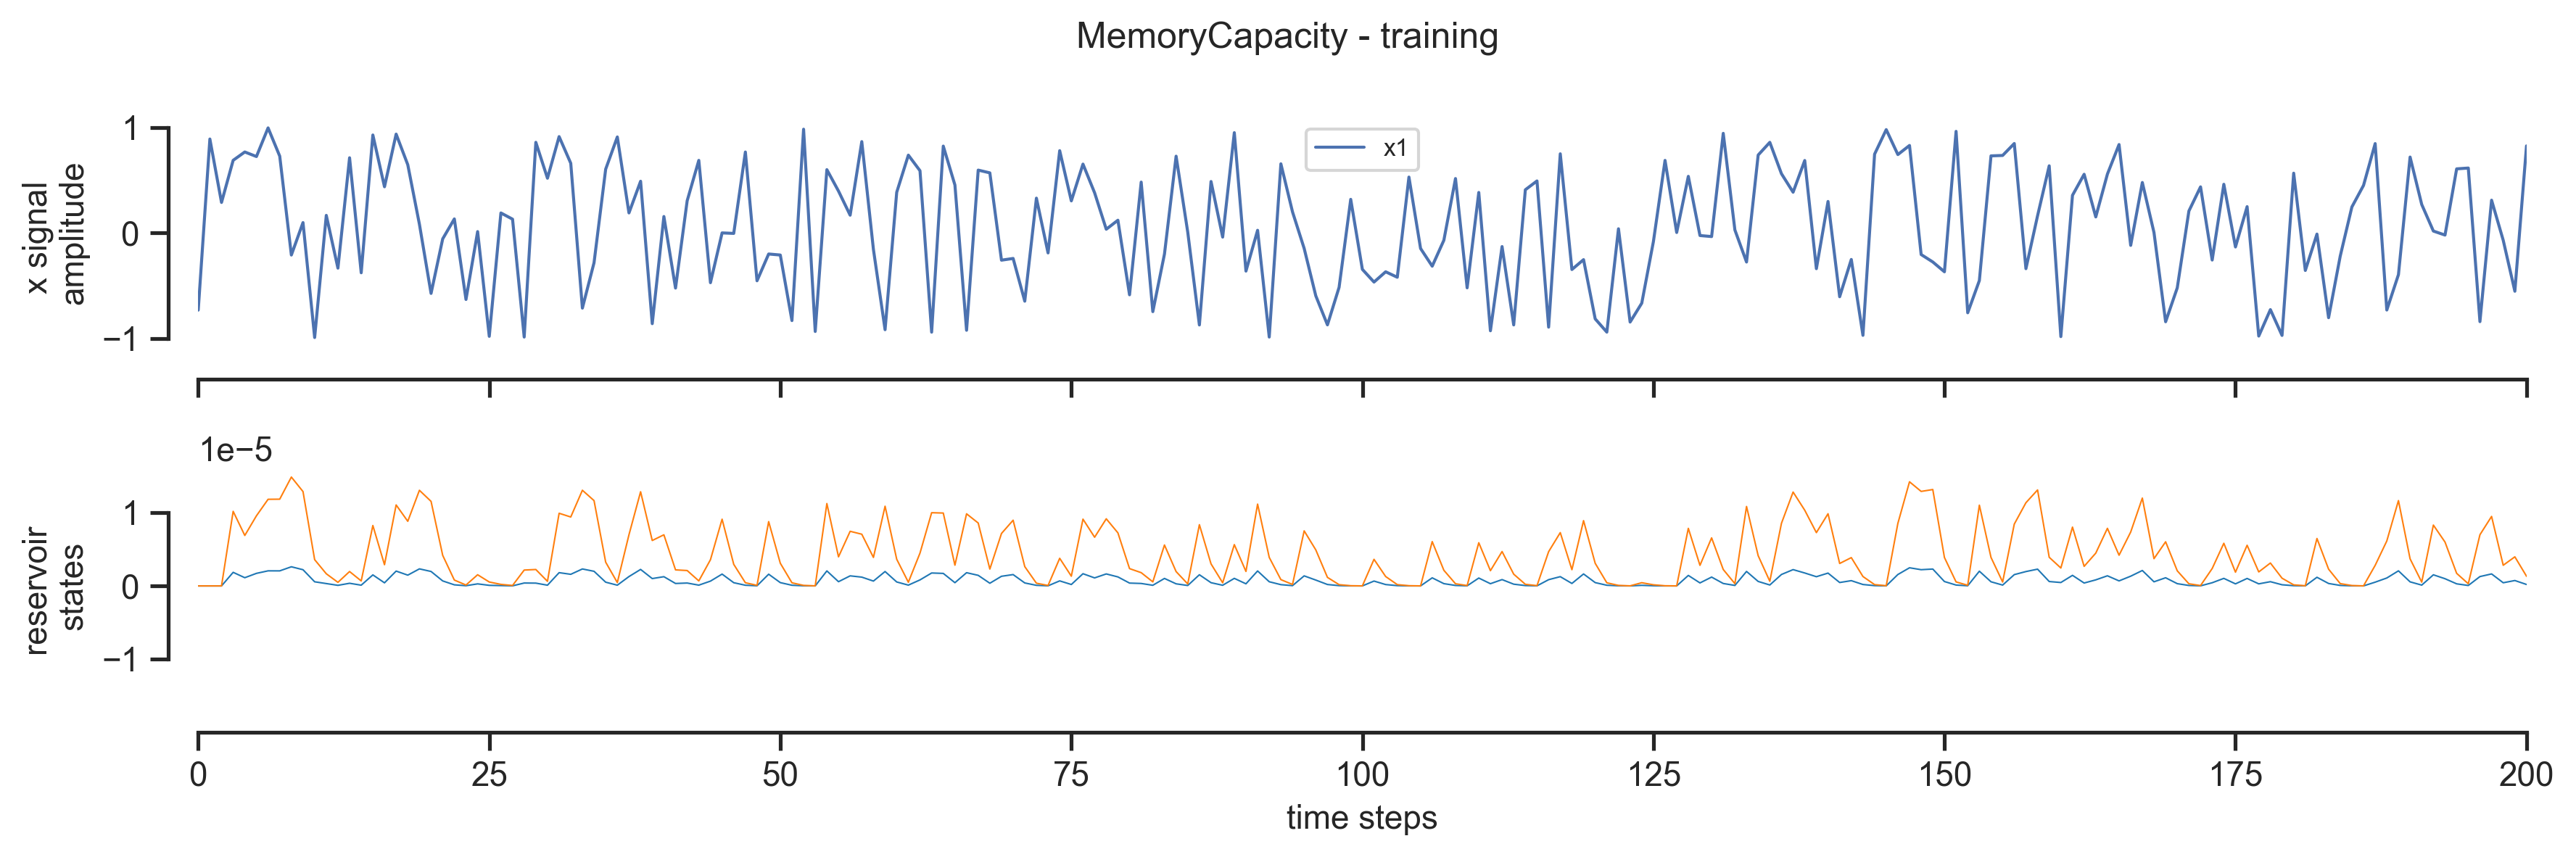


			----- alpha = 1.25 -----
Alpha = 1.25, Number of non-zero elements in scaled w: 8893

			----- alpha = 1.5 -----
Alpha = 1.5, Number of non-zero elements in scaled w: 8893


In [51]:
# Initialize an empty list to collect results for different alpha values
df_alpha = []

# Iterate over specified alpha values in ALPHAS
for alpha in ALPHAS:
    print(f'\n\t\t\t----- alpha = {np.round(alpha, 2)} -----')

    # Scale connectivity matrix by alpha
    esn.w = alpha * conn.w
    print(f"Alpha = {alpha}, Number of non-zero elements in scaled w: {np.count_nonzero(esn.w)}")

    # Simulate reservoir states for training and testing datasets
    rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
    rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

    # Generate diagnostic plots if alpha equals 1.0
    if alpha == 1.0:
        # Plot reservoir states for training data
        plotting.plot_reservoir_states(
            x=x_train, reservoir_states=rs_train,
            title=f'{task.name} - training',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )

        """# Diagnostic plots for training
        plotting.plot_diagnostics(
            x=x_train, y=y_train, reservoir_states=rs_train,
            trained_model=readout_module.model, title=f'{task.name} - training diagnostics',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )

        # Diagnostic plots for testing
        plotting.plot_diagnostics(
            x=x_test, y=y_test, reservoir_states=rs_test,
            trained_model=readout_module.model, title=f'{task.name} - test diagnostics',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )"""

    # Run the task on the model and get performance results
    df_res = readout_module.run_task(
        X=(rs_train, rs_test), y=(y_train, y_test),
        sample_weight='both', metric=METRICS,
        readout_modules=None, readout_nodes=None,
    )

    # Add alpha value to the result
    df_res['alpha'] = np.round(alpha, 3)

    # Append this result to the list of all alpha results
    df_alpha.append(df_res)

# Concatenate all collected results into a single DataFrame
df_alpha = pd.concat(df_alpha, ignore_index=True)



In [166]:
print(f"rs_train std: {np.std(rs_train)}, rs_test std: {np.std(rs_test)}")

rs_train std: 8.01270210493621e-06, rs_test std: 7.847042906731612e-06


In [167]:
print(f"Alpha = {alpha}, rs_train mean: {np.mean(rs_train)}, rs_test mean: {np.mean(rs_test)}")

Alpha = 1.5, rs_train mean: 6.193361611766334e-06, rs_test mean: 5.973261030315346e-06


In [168]:
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

y_train shape: (700, 20), y_test shape: (300, 20)


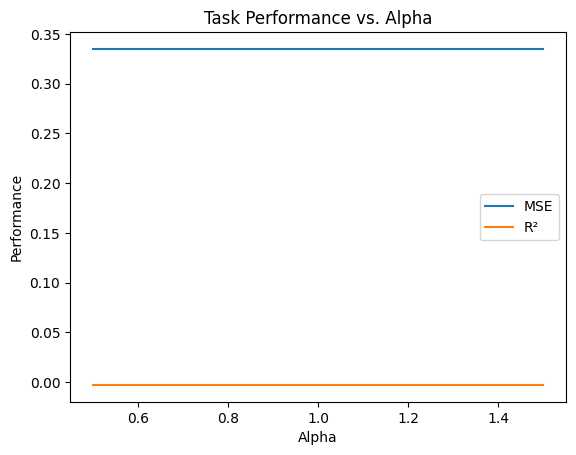

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot der Leistung über verschiedene alpha-Werte
sns.lineplot(data=df_alpha, x='alpha', y='mean_squared_error', label='MSE')
sns.lineplot(data=df_alpha, x='alpha', y='r2_score', label='R²')
plt.title('Task Performance vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [50]:
# Visualize performance, including the new signal detection accuracy
df_melt = pd.melt(
    df_alpha,
    id_vars=['alpha'],
    value_vars=['balanced_accuracy_score', 'f1_score', "filtered_accuracy_score"],
    var_name='metric',
    value_name='score'
)

# Plot performance for all metrics
plotting.plot_performance(
    df_melt,
    x='alpha',
    y='score',
    hue='metric',
    title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True,  # This should display the plot
    ax_params={'ylim': (0, 1)}  # Add y-axis limits directly to the `ax_params`
)

KeyError: "The following 'value_vars' are not present in the DataFrame: ['balanced_accuracy_score', 'f1_score', 'filtered_accuracy_score']"

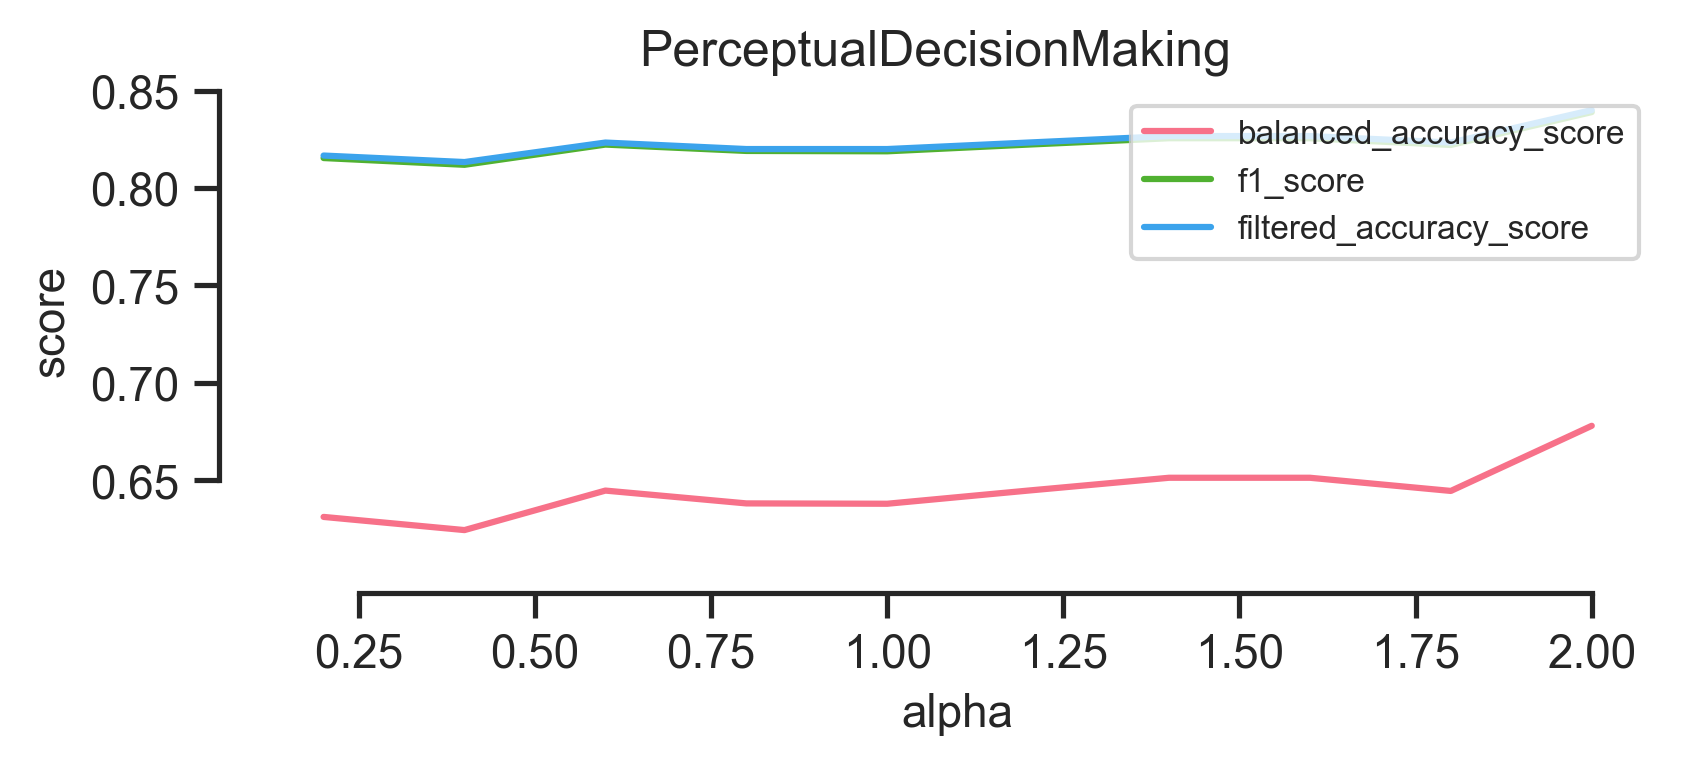

In [ ]:
# Visualize performance, including the new signal detection accuracy
df_melt = pd.melt(df_alpha,
                  id_vars=['alpha'],
                  value_vars=['balanced_accuracy_score', 'f1_score', "filtered_accuracy_score"],
                  var_name='metric',
                  value_name='score'
                 )

# Plot performance for all metrics including signal detection accuracy
plotting.plot_performance(
    df_melt,
    x='alpha', y='score',
    hue='metric',
    title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

DIFFICULTY


Running task for difficulty: easy


Running iterations for easy: 100%|██████████| 25/25 [00:28<00:00,  1.16s/it]



Running task for difficulty: medium


Running iterations for medium: 100%|██████████| 25/25 [00:30<00:00,  1.22s/it]



Running task for difficulty: hard


Running iterations for hard: 100%|██████████| 25/25 [00:33<00:00,  1.32s/it]


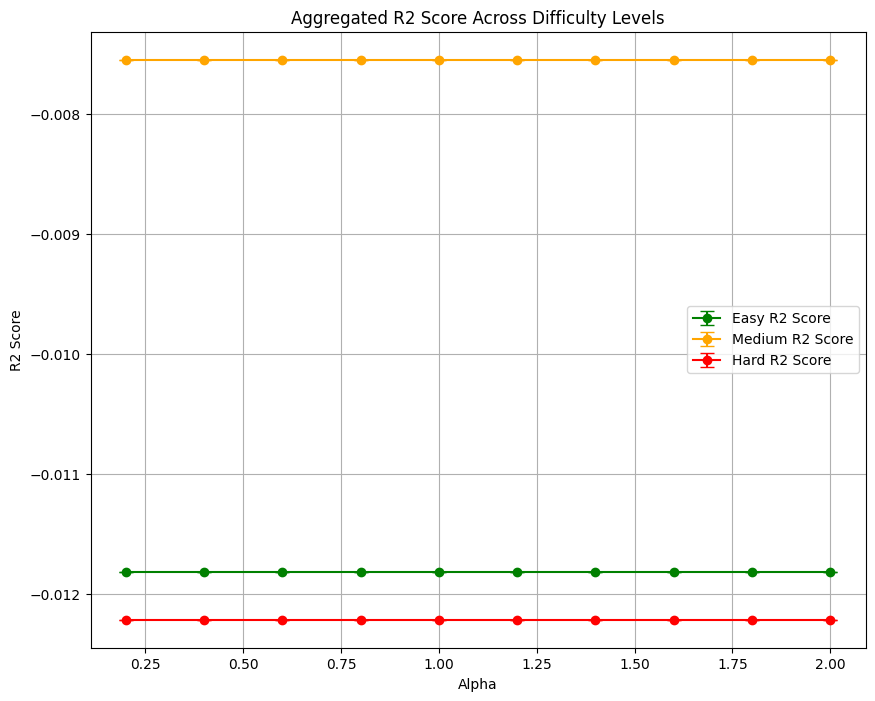

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from conn2res import plotting

# Number of iterations
iterations = 25

# Directory for saving results
output_dir = './reservoir_results/memory_capacity/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of input repetitions
n_repeats = 1  # Define the number of repetitions for the input nodes

# Define difficulty levels for the MemoryCapacity task
difficulty_levels = {
    'easy': {'horizon_max': -10, 'input_gain': 1.0, 'low': -0.5, 'high': 0.5},
    'medium': {'horizon_max': -20, 'input_gain': 0.8, 'low': -1.0, 'high': 1.0},
    'hard': {'horizon_max': -30, 'input_gain': 0.5, 'low': -1.5, 'high': 1.5},
}

# Initialize a dictionary to aggregate metrics across iterations for each alpha and difficulty level
alpha_metrics = {
    difficulty: {alpha: {'r2_score': [], 'mean_squared_error': []} for alpha in ALPHAS}
    for difficulty in difficulty_levels
}

# Initialize summary data list
summary_data = []

# Loop through difficulty levels
for difficulty, params in difficulty_levels.items():
    print(f"\nRunning task for difficulty: {difficulty}")

    # Fetch data for this difficulty level
    x, y = task.fetch_data(
        n_trials=1000,
        horizon_max=params['horizon_max'],
        input_gain=params['input_gain'],
        low=params['low'],
        high=params['high']
    )

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

    # Loop through iterations for this difficulty level
    for iteration in tqdm(range(1, iterations + 1), desc=f"Running iterations for {difficulty}"):
        
        # Initialize w_in matrix for the task
        w_in = np.zeros((task.n_features, conn.n_nodes))
        for i in range(len(input_nodes)):
            w_in[i, input_nodes[i]] = 1

        # Prepare to store results for each alpha value
        df_alpha = []

        # Iterate over alpha values
        for alpha in ALPHAS:
            # Scale connectivity matrix by alpha
            esn.w = alpha * conn.w

            # Simulate reservoir states (training and testing)
            rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
            rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

            # Run the task using the readout module
            df_res = readout_module.run_task(
                X=(rs_train, rs_test),
                y=(y_train, y_test),
                sample_weight='both',
                metric=METRICS,  # MemoryCapacity-specific metrics
                readout_modules=None,
                readout_nodes=None
            )

            # Add alpha and difficulty to df_res
            df_res['difficulty'] = difficulty
            df_res['alpha'] = alpha
            df_alpha.append(df_res)

            # Aggregate metrics for this alpha and difficulty level
            alpha_metrics[difficulty][alpha]['r2_score'].append(df_res['r2_score'].mean())
            alpha_metrics[difficulty][alpha]['mean_squared_error'].append(df_res['mean_squared_error'].mean())

        # Concatenate and save results for this iteration
        df_alpha = pd.concat(df_alpha, ignore_index=True)

        # Save summary data for this iteration and difficulty level
        summary_data.append({
            'Iteration': iteration,
            'Difficulty': difficulty,
            'MeanR2Score': np.mean([alpha_metrics[difficulty][alpha]['r2_score'][-1] for alpha in ALPHAS]),
            'MeanMSE': np.mean([alpha_metrics[difficulty][alpha]['mean_squared_error'][-1] for alpha in ALPHAS]),
            'StdDevR2Score': np.std([alpha_metrics[difficulty][alpha]['r2_score'][-1] for alpha in ALPHAS]),
            'StdDevMSE': np.std([alpha_metrics[difficulty][alpha]['mean_squared_error'][-1] for alpha in ALPHAS])
        })

# Save all summary data to a CSV file
summary_file = os.path.join(output_dir, 'summary_memory_capacity.csv')
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(summary_file, index=False)

# Plot aggregated R2 score across difficulty levels
plt.figure(figsize=(10, 8))
colors = {'easy': 'green', 'medium': 'orange', 'hard': 'red'}

for difficulty, color in colors.items():
    aggregated_r2 = [np.mean(alpha_metrics[difficulty][alpha]['r2_score']) for alpha in ALPHAS]
    r2_std = [np.std(alpha_metrics[difficulty][alpha]['r2_score']) for alpha in ALPHAS]

    plt.errorbar(ALPHAS, aggregated_r2, yerr=r2_std, label=f'{difficulty.capitalize()} R2 Score',
                 marker='o', capsize=5, color=color)

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Aggregated R2 Score Across Difficulty Levels')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'r2_score_difficulty_levels.png'), dpi=300)
plt.show()



In [ ]:
# Define the number of iterations
iterations = 10 

# Update the task to "MemoryCapacity"
TASK = 'MemoryCapacity'

# Instantiate the MemoryCapacity task
task = Conn2ResTask(name=TASK)

# Fetch input/output data
x, y = task.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# Split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

# Define difficulty levels for MemoryCapacity
difficulty_levels = {
    'easy': {'horizon_max': -5, 'win': 10, 'low': -0.5, 'high': 0.5, 'input_gain': 0.5},
    'moderate': {'horizon_max': -10, 'win': 20, 'low': -1, 'high': 1, 'input_gain': 1},
    'difficult': {'horizon_max': -20, 'win': 30, 'low': -2, 'high': 2, 'input_gain': 2},
}

# Loop through difficulty levels and fetch data
for difficulty, params in difficulty_levels.items():
    print(f"\nRunning MemoryCapacity task for difficulty: {difficulty}")

    # Fetch input and output data with specified parameters
    x, y = task.fetch_data(
        n_trials=1000, 
        horizon_max=params['horizon_max'], 
        win=params['win'], 
        low=params['low'], 
        high=params['high'], 
        input_gain=params['input_gain']
    )
    
    # Use x, y for the reservoir task as usual
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)
    
    # Repeat the experimental setup
    for iteration in tqdm(range(1, iterations + 1), desc=f"Running iterations for {difficulty}"):
        # # Node selection logic (random or informed)
        # input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)
        # available_nodes = list(set(range(conn.n_nodes)) - set(input_nodes))
        # output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)

        # Adjust input connectivity
        w_in = np.zeros((num_features, conn.n_nodes))
        for i in range(num_features):
            for j in range(num_nodes_per_input):
                w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1

        # Experiment with varying alpha values
        df_alpha = []
        for alpha in ALPHAS:
            esn.w = alpha * conn.w
            rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
            rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

            df_res = readout_module.run_task(
                X=(rs_train, rs_test), 
                y=(y_train, y_test),
                sample_weight='both', 
                metric=METRICS, 
                readout_modules=None, 
                readout_nodes=None
            )

            df_res['alpha'] = np.round(alpha, 3)
            df_res['difficulty'] = difficulty
            df_alpha.append(df_res)

        df_alpha = pd.concat(df_alpha, ignore_index=True)

        # Save results to CSV (modify file names as needed)
        summary_file = os.path.join(output_dir, f'summary_{TASK.lower()}_{difficulty}_nodes.csv')
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_csv(summary_file, index=False)

# Plot aggregated performance metrics for MemoryCapacity
plt.figure(figsize=(10, 8))
colors = {'low': 'blue', 'medium': 'orange', 'high': 'red'}

for difficulty, color in colors.items():
    aggregated_accuracy = [np.mean(alpha_metrics[difficulty][alpha]['accuracy']) for alpha in ALPHAS]
    aggregated_f1_score = [np.mean(alpha_metrics[difficulty][alpha]['f1_score']) for alpha in ALPHAS]
    aggregated_filtered_accuracy = [np.mean(alpha_metrics[difficulty][alpha]['filtered_accuracy_score']) for alpha in ALPHAS]

    plt.errorbar(ALPHAS, aggregated_accuracy, label=f'{difficulty.capitalize()} Accuracy',
                 marker='o', capsize=5, color=color, linestyle='-')
    plt.errorbar(ALPHAS, aggregated_f1_score, label=f'{difficulty.capitalize()} F1 Score',
                 marker='x', capsize=5, color=color, linestyle='--')
    plt.errorbar(ALPHAS, aggregated_filtered_accuracy, label=f'{difficulty.capitalize()} Filtered Accuracy',
                 marker='s', capsize=5, color=color, linestyle=':')

plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Performance Metrics Across Alpha Values for MemoryCapacity')
plt.ylim(0, 1)  # Scale the y-axis from 0 to 1
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, f'performance_{TASK.lower()}_nodes.png'), dpi=300)
plt.show()



Running MemoryCapacity task for difficulty: easy


Running iterations for easy:   0%|          | 0/10 [00:00<?, ?it/s]


ValueError: shapes (1,) and (3,356) not aligned: 1 (dim 0) != 3 (dim 0)

RANDOMIZATION

In [52]:
def compare_randomized_performance(original_matrix, swaps=10, n_repeats=1, iterations=5, alpha_value=1.0):
    """
    Randomize the connectivity matrix and compare its performance with the original using a fixed alpha value.
    
    Returns:
        summary_df (pd.DataFrame): DataFrame summarizing performance metrics.
        random_matrix (np.ndarray): The randomized connectivity matrix.
    """
    import copy
    from conn2res.connectivity import Conn
    from conn2res.utils import check_symmetric
    from bct.algorithms.reference import randmio_und_connected, randmio_dir_connected

    # Copy the original matrix for safety
    random_matrix = copy.deepcopy(original_matrix)
    
    # Check if the matrix is symmetric or directed
    if check_symmetric(original_matrix):
        random_matrix, _ = randmio_und_connected(random_matrix, swaps)
    else:
        random_matrix, _ = randmio_dir_connected(random_matrix, swaps)

    # Load both matrices into the Conn object
    original_conn = Conn(w=original_matrix)
    randomized_conn = Conn(w=random_matrix)

    # Initialize summary data
    summary_data = []

    # Fetch input/output data
    x, y = task.fetch_data(n_trials=1000, input_gain=1)

    # Überprüfe die Struktur von x
    if isinstance(x, np.ndarray) and x.ndim == 1:
        # Konvertiere x in eine 2D-Struktur
        x = x[:, np.newaxis]

    # Repeat input data based on n_repeats
    if n_repeats > 1:
        x = np.tile(x, (1, n_repeats))

    task.n_features = x.shape[1]  # Set n_features to match the input size

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

    # Iterate over specified iterations
    for iteration in tqdm(range(1, iterations + 1), desc="Running iterations"):
        
        # Set random input/output nodes for each iteration
        input_nodes = original_conn.get_nodes('random', n_nodes=task.n_features)
        all_nodes = set(range(original_conn.n_nodes))
        available_nodes = list(all_nodes - set(input_nodes))
        output_nodes = np.random.choice(available_nodes, 3, replace=False)
        
        # Initialize w_in
        w_in = np.zeros((task.n_features, original_conn.n_nodes))
        for i in range(task.n_features):
            w_in[i, input_nodes[i]] = 1

        # Initialize ESN objects
        original_esn = EchoStateNetwork(w=original_conn.w, activation_function=ACT_FCN)
        randomized_esn = EchoStateNetwork(w=randomized_conn.w, activation_function=ACT_FCN)

        # Prepare to store metrics
        iteration_data = {'iteration': iteration}

        for matrix_type, esn, conn in [('original', original_esn, original_conn), ('randomized', randomized_esn, randomized_conn)]:
            # Scale the connectivity matrix by the fixed alpha value
            esn.w = alpha_value * conn.w

            # Simulate reservoir states
            rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
            rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

            # Run task
            df_res = readout_module.run_task(
                X=(rs_train, rs_test),
                y=(y_train, y_test),
                sample_weight='both',
                metric=['mean_squared_error', 'r2_score']  # Updated metrics
            )

            # Collect metrics
            iteration_data[f'{matrix_type}_r2_score'] = df_res['r2_score'].mean()
            iteration_data[f'{matrix_type}_mse'] = df_res['mean_squared_error'].mean()

        # Append iteration data to summary
        summary_data.append(iteration_data)

    # Convert summary data to DataFrame
    summary_df = pd.DataFrame(summary_data)

    # Save summary
    summary_file = os.path.join(output_dir, 'randomized_vs_original_summary.csv')
    summary_df.to_csv(summary_file, index=False)

    print(f"\nSummary saved to {summary_file}")
    return summary_df, random_matrix



In [53]:
compare_randomized_performance(original_matrix=conn.w, iterations=5, swaps=10)

Running iterations: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]


Summary saved to ./reservoir_results/memory_capacity/randomized_vs_original_summary.csv


(   iteration  original_r2_score  original_mse  randomized_r2_score  \
 0          1           -0.00074      0.335137             0.000294   
 1          2           -0.00074      0.335137            -0.000740   
 2          3           -0.00074      0.335137            -0.000740   
 3          4           -0.00074      0.335137            -0.000740   
 4          5           -0.00074      0.335137            -0.000740   
 
    randomized_mse  
 0        0.334789  
 1        0.335137  
 2        0.335137  
 3        0.335137  
 4        0.335137  ,
 array([[0.00000000e+00, 2.37934275e-05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.66575660e-03, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.71774579e-06, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0

In [54]:
# Run the comparison and retrieve the random matrix
summary_df, random_matrix = compare_randomized_performance(original_matrix=conn.w, iterations=1, swaps=10)

# Visualize the matrices
# visualize_matrices(original_matrix=conn.w, randomized_matrix=random_matrix)

Running iterations: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


Summary saved to ./reservoir_results/memory_capacity/randomized_vs_original_summary.csv


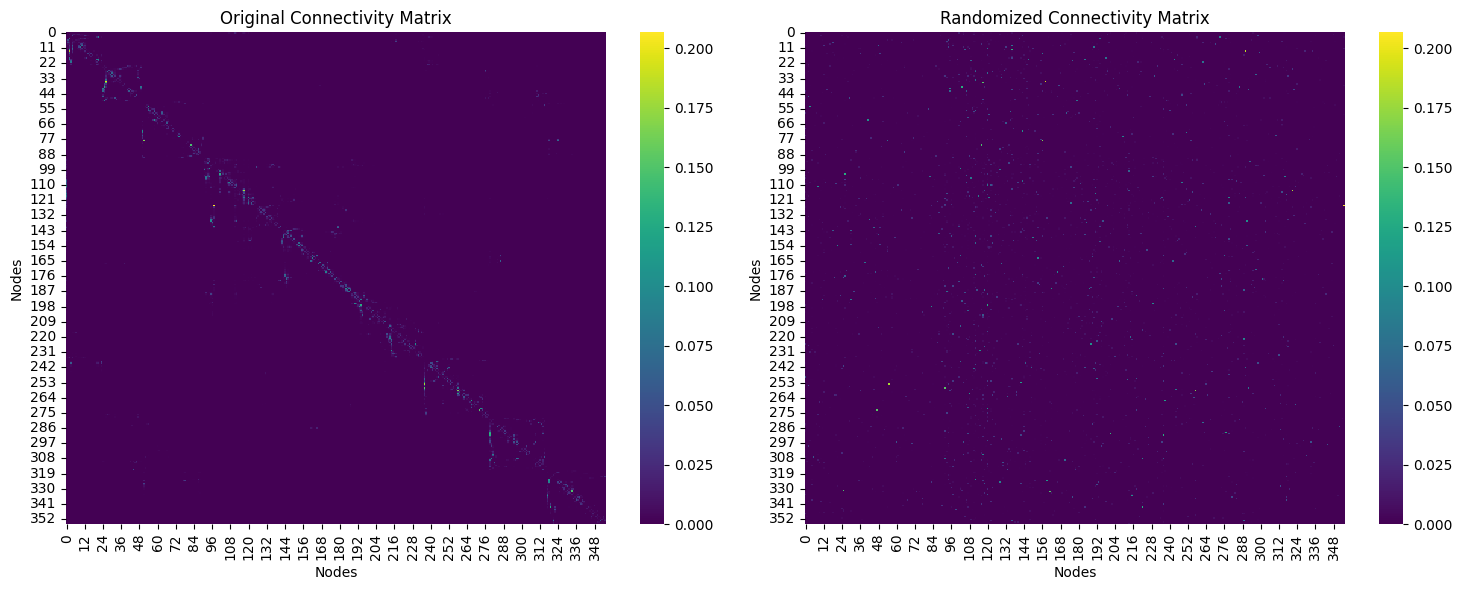

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def visualize_matrices(original_matrix, randomized_matrix):
    """
    Visualizes and compares the original and randomized connectivity matrices.
    
    Parameters:
        original_matrix (np.ndarray): The original connectivity matrix.
        randomized_matrix (np.ndarray): The randomized connectivity matrix.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Heatmap for the original matrix
    sns.heatmap(original_matrix, ax=axes[0], cmap="viridis", cbar=True)
    axes[0].set_title("Original Connectivity Matrix")
    axes[0].set_xlabel("Nodes")
    axes[0].set_ylabel("Nodes")

    # Heatmap for the randomized matrix
    sns.heatmap(randomized_matrix, ax=axes[1], cmap="viridis", cbar=True)
    axes[1].set_title("Randomized Connectivity Matrix")
    axes[1].set_xlabel("Nodes")
    axes[1].set_ylabel("Nodes")

    plt.tight_layout()
    plt.show()

# Call the function with your matrices
visualize_matrices(original_matrix=conn.w, randomized_matrix=random_matrix)

In [56]:
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn.w))

Number of non-zero elements in conn_matrix_normalized: 8893


PERTUBATION

In [57]:
print("x_test shape:", x_test[0].shape)
print("x_train shape:", x_train[0].shape)
print("matrix shape:", conn.w.shape)
print("w_in shape:", w_in.shape)
print("random matrix shape:", random_matrix.shape)

x_test shape: (1,)
x_train shape: (1,)
matrix shape: (356, 356)
w_in shape: (1, 356)
random matrix shape: (356, 356)



Iteration 1: Perturbing 3 Nodes
Nodes to remove: [ 97 135 258]
Iteration 1 Results:
    r2_score  mean_squared_error  iteration  perturbation
0 -0.001548            0.319272          1          True

Iteration 2: Perturbing 3 Nodes
Nodes to remove: [221  50 297]
Iteration 2 Results:
    r2_score  mean_squared_error  iteration  perturbation
0 -0.000178            0.334006          2          True

Iteration 3: Perturbing 3 Nodes
Nodes to remove: [320 106  22]
Iteration 3 Results:
    r2_score  mean_squared_error  iteration  perturbation
0 -0.002472            0.310491          3          True

Iteration 4: Perturbing 3 Nodes
Nodes to remove: [ 83 110 337]
Iteration 4 Results:
    r2_score  mean_squared_error  iteration  perturbation
0 -0.000643            0.335937          4          True

Iteration 5: Perturbing 3 Nodes
Nodes to remove: [ 42 306 148]
Iteration 5 Results:
    r2_score  mean_squared_error  iteration  perturbation
0 -0.006055            0.302112          5          True


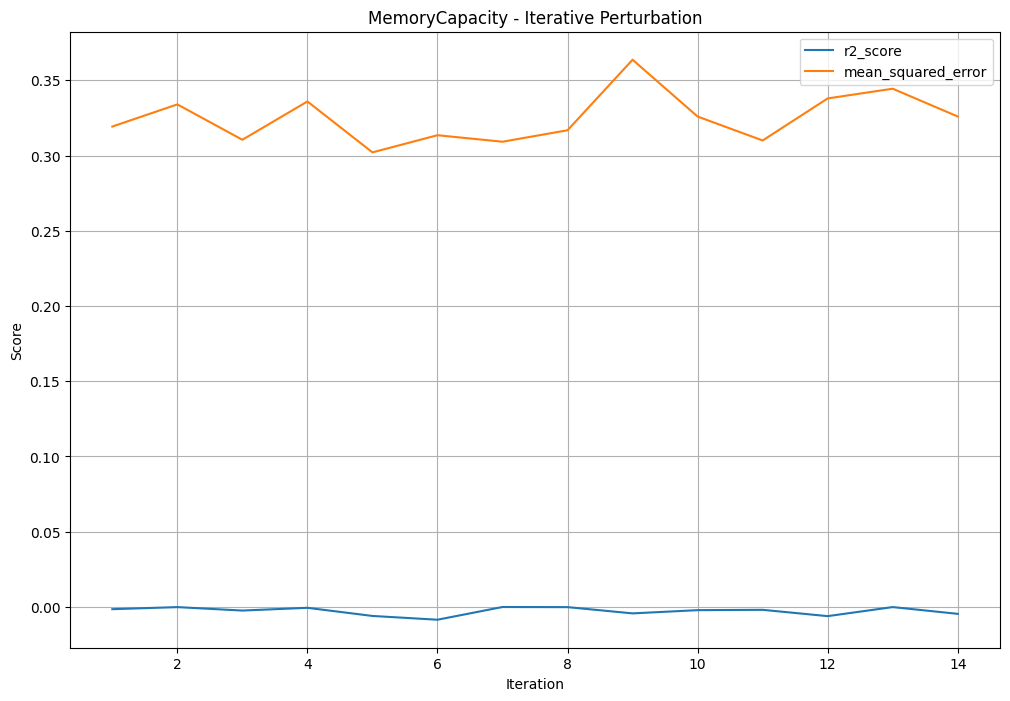

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from conn2res import plotting
from conn2res.reservoir import EchoStateNetwork
from conn2res.readout import Readout

# Number of iterations and nodes to perturb per iteration
n_iterations = 50
nodes_to_perturb = 3

# Directory to save results
output_dir = './reservoir_results/perturbation/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Copy the original connectivity matrix for perturbation
perturbed_matrix = conn.w.copy()

# List to store iteration results
iteration_results = []

# Initialize input and output nodes
updated_input_nodes = input_nodes.copy()
updated_output_nodes = output_nodes.copy()

for iteration in range(1, n_iterations + 1):
    print(f"\nIteration {iteration}: Perturbing {nodes_to_perturb} Nodes")

    # Check if there are enough nodes to perturb
    if len(perturbed_matrix) <= nodes_to_perturb:
        print("Matrix too small to perturb further. Stopping iteration.")
        break

    # Select random nodes to perturb, excluding input and output nodes
    all_nodes = set(range(perturbed_matrix.shape[0]))
    non_perturbable_nodes = set(updated_input_nodes).union(set(updated_output_nodes))
    perturbable_nodes = list(all_nodes - non_perturbable_nodes)
    
    if len(perturbable_nodes) < nodes_to_perturb:
        print("Not enough perturbable nodes remaining. Stopping iteration.")
        break

    nodes_to_remove = np.random.choice(perturbable_nodes, nodes_to_perturb, replace=False)
    print(f"Nodes to remove: {nodes_to_remove}")

    # Remove the nodes (rows and columns) from the perturbed matrix
    perturbed_matrix = np.delete(perturbed_matrix, nodes_to_remove, axis=0)
    perturbed_matrix = np.delete(perturbed_matrix, nodes_to_remove, axis=1)

    # Update the indices of the remaining input/output nodes
    current_nodes = list(range(perturbed_matrix.shape[0]))
    node_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(current_nodes)}

    updated_input_nodes = [node_mapping[node] for node in updated_input_nodes if node in node_mapping]
    updated_output_nodes = [node_mapping[node] for node in updated_output_nodes if node in node_mapping]

    # Ensure valid input/output nodes remain
    if len(updated_input_nodes) == 0 or len(updated_output_nodes) == 0:
        print("No valid input/output nodes remaining. Stopping iteration.")
        break

    # Update w_in to match the remaining input nodes
    adjusted_w_in = np.zeros((len(updated_input_nodes), perturbed_matrix.shape[0]))
    for i, node in enumerate(updated_input_nodes):
        adjusted_w_in[i, node] = 1

    # Fetch input/output data
    task.n_features = len(updated_input_nodes)
    x, y = task.fetch_data(n_trials=1000, input_gain=1)

    # Split the data
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

    # Simulate the reservoir with the perturbed matrix
    perturbed_esn = EchoStateNetwork(w=perturbed_matrix.copy(), activation_function='tanh')

    try:
        rs_train = perturbed_esn.simulate(ext_input=x_train, w_in=adjusted_w_in, output_nodes=updated_output_nodes)
        rs_test = perturbed_esn.simulate(ext_input=x_test, w_in=adjusted_w_in, output_nodes=updated_output_nodes)
    except ValueError as e:
        print(f"Simulation failed due to dimension mismatch: {e}")
        break

    # Reinitialize the readout module
    readout_module = Readout(estimator=readout.select_model(y))

    # Run the task and collect performance metrics
    df_res = readout_module.run_task(
        X=(rs_train, rs_test), 
        y=(y_train, y_test),
        sample_weight='both',
        metric=['r2_score', 'mean_squared_error'],
        readout_modules=None,
        readout_nodes=None
    )

    # Add iteration and perturbation information to the results
    df_res['iteration'] = iteration
    df_res['perturbation'] = True
    iteration_results.append(df_res)

    print(f"Iteration {iteration} Results:\n", df_res)

# Combine all iteration results into a single DataFrame
df_iteration_results = pd.concat(iteration_results, ignore_index=True)

# Save the results to a CSV file
output_file = os.path.join(output_dir, 'iterative_perturbation_results.csv')
df_iteration_results.to_csv(output_file, index=False)
print(f"\nIterative perturbation results saved to {output_file}")

# Visualize performance metrics across all iterations
df_melt = pd.melt(
    df_iteration_results,
    id_vars=['iteration'],
    value_vars=['r2_score', 'mean_squared_error'],  # Update with the metrics used
    var_name='metric',
    value_name='score'
)

# Plot the performance metrics
plt.figure(figsize=(12, 8))
for metric in df_melt['metric'].unique():
    metric_data = df_melt[df_melt['metric'] == metric]
    plt.plot(metric_data['iteration'], metric_data['score'], label=metric)
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title(f"{task.name} - Iterative Perturbation")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_dir, 'performance_metrics.png'))
plt.show()
